[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/TobGerken/ISAT300/blob/main/2_DataVisualization.ipynb)

# Data Visualization

**This notebook is published on my github. It is publicly accessible, but you cannot save your changes to my github. Learning git & github is beyond the scope of this course. If you are familiar with github, you know what to do. If you don't know github, you can save a personal copy of the file to your google drive, so that you can save your changes and can access them at a later date**

This notebook is a continuation from previous classes:

1. [GettingStarted](https://github.com/TobGerken/ISAT300/blob/main/1_GettingStarted.ipynb)

### Purpose

Last lecture, we practiced how to read data into _pandas_ and how to calculate simple statistics. This means we can now access our measurements in _Python_ and conduct an analysis. 

The next step is understanding on how to use figures to understand the data that we measured and to communicate the results of our analysis. 

Also, presenting data in clear and appealing figures is a useful professional skill. 

### Learning Goals 

After completing this notebook, you should be able to 

- use _Python_ and _pandas_ to read `csv-files`
- know how to access and read the documentation for functions
- create plots of variables within _dataframes_
- visualize the distribution of measurements using histograms
- understand how choice of the bin number affects the histogram
- manipulate plots (including histograms) to add labels and a title. 


## Now lets get started 

This really only scratches the surface and there are so many good resources around. Come and talk to me if you want to know more. I am also pointing out some resources along the way and will link to them on Canvas. 

We previously covered some [Pandas](https://pandas.pydata.org/) dataframe basics and performed some initial statistics. Well crafted figures are a powerful tool to communicate our main findings and to [tell compelling stories with data](https://hbr.org/2013/04/how-to-tell-a-story-with-data).  

Because we are still using pandas we have to import it first. 

In [1]:
# running this will import pandas.
import pandas as pd

## Getting help

We all need a little help sometimes. Check out the help command. There is going to be a lot of information provided. There is no need to understand all of it, but sometimes this can be helpful. When you are unsure, try `help()`.

In [2]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers.readers:

read_csv(filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]', *, sep: 'str | None | lib.NoDefault' = <no_default>, delimiter: 'str | None | lib.NoDefault' = None, header: "int | Sequence[int] | None | Literal['infer']" = 'infer', names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>, index_col: 'IndexLabel | Literal[False] | None' = None, usecols=None, squeeze: 'bool | None' = None, prefix: 'str | lib.NoDefault' = <no_default>, mangle_dupe_cols: 'bool' = True, dtype: 'DtypeArg | None' = None, engine: 'CSVEngine | None' = None, converters=None, true_values=None, false_values=None, skipinitialspace: 'bool' = False, skiprows=None, skipfooter: 'int' = 0, nrows: 'int | None' = None, na_values=None, keep_default_na: 'bool' = True, na_filter: 'bool' = True, verbose: 'bool' = False, skip_blank_lines: 'bool' = True, parse_dates=None, infer_datetime_format: 'bool' = False, keep_date_col: 'bool' = F

As a side note, when you edit a cell, you can also hit the `Tab` key and it will provide some suggestions on what you can do. 
**Try it out: Type: `pd.` and hit the Tab key** the cell below.

## Reading data into a pandas dataframe

We will use the same data as before and will load this into a dataframe `df`. You can chose to load the data from the online source or to load a local copy. 

In [3]:
# This loads the data, which is saved online: 
df = pd.read_csv('https://raw.githubusercontent.com/TobGerken/ISAT300/main/Data/mpg_cated.csv')

# This would read a local copy from the data, provided that it is stored in the base folder. 
# df = pd.read_csv('./mpg_cated.csv')

Let's remind us what the data we loaded looked like by looking at the fist few entries

In [4]:
df.head()
# You can also display the last few entries with the tail function. Try uncommenting it! 
# df.tail()

,origin,cylinders,model_year,mpg_level,car_company,mpg,displacement,horsepower,weight,acceleration
0,usa,8,70,medium,chevrolet,18.0,307.0,130.0,3504,12.0
1,usa,8,70,low,buick,15.0,350.0,165.0,3693,11.5
2,usa,8,70,medium,plymouth,18.0,318.0,150.0,3436,11.0
3,usa,8,70,low,amc,16.0,304.0,150.0,3433,12.0
4,usa,8,70,medium,ford,17.0,302.0,140.0,3449,10.5


In [5]:
# This will give you the dimension of the data
df.shape

(392, 10)

The results from `df.shape` tell us that there is 392 rows with 10 columns in our dataframe. 

The `df.info()` command is another great way of understanding our data. It will provide information about the types of data and how many valid data entries there are. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   origin        392 non-null    object 
 1   cylinders     392 non-null    int64  
 2   model_year    392 non-null    int64  
 3   mpg_level     392 non-null    object 
 4   car_company   392 non-null    object 
 5   mpg           392 non-null    float64
 6   displacement  392 non-null    float64
 7   horsepower    392 non-null    float64
 8   weight        392 non-null    int64  
 9   acceleration  392 non-null    float64
dtypes: float64(4), int64(3), object(3)
memory usage: 30.8+ KB


**Questions about the `Non-Null` Count and the `Dtype` columns.**  

- **Dtype:** Look at the mpg data (see above) and find out the difference between `object`, `int`, and `float`.

- **non-null:** 
  - Look up what it means for a table to have [NULL values](https://en.wikipedia.org/wiki/Null_(SQL)) 
  - Compare this to the length of the mpg data frame (see `df.shape` above)
  - Does the table have missing data? 

Missing data can be a big problem for statistics and data visualization, since they may not work or produce the wrong results. Therefore it is important to always check for missing values. 

Missing values are often represented as `NaN` or `nan`
Here is an example for a common problem with missing data, when calculating descriptive statistics like the `mean` value. 

NaN or nan stands for not a number. This is different from zero, but indicates that it is impossible to do calculations on this value. 

In [17]:
import numpy as np
array_without_missing_data = np.array([1,2,3,4,5])
array_with_missing_data    = np.array([1,2,np.nan,4,5])

print('The mean of', array_without_missing_data,  'without missing data is:' , array_without_missing_data.mean())
print('The mean of', array_with_missing_data, 'with missing data is:' , array_with_missing_data.mean())

[1 2 3 4 5]
The mean of [1 2 3 4 5] without missing data is: 3.0
The mean of [ 1.  2. nan  4.  5.] with missing data is: nan


## Getting Started with Data visualization

Python contains very powerfull capabilities for data visualziation. One of these is the matplotlib library, which capable of producing complex publication-quality figures with fine layout control in two and three dimensions. 

[Matplotlib](http://matplotlib.org) is quite old and is built to be familiar to Matlab users. While it is an older library, so many libraries are built on top of it and use its syntax. We might encounter some of these later in the semester.

One neat thing about matplotlib is that pandas is actually using the features of matplotlib to produce figures. This will become clearer later. 

For now, you just need to know that making plots is really easy. 

If we have a dataframe we can just call the `.plot()` method and a plot will appear. Neat ;-)

In [ ]:
df.plot()

Now we have a plot of the dataframe, but it is not very useful to see what is going on.

**Q1: Why?** 

**Q2: What is missing from this plot?**

One of the things we notice is that we have created a line-plot for the entire dataframe. Each column, e.g. `mpg` or `weight`, is treated as a line, which makes it really difficult to differentiate between them. Also we lost any information about categorical data such as `origin`.

Let's try this again. Use you knowledge from the last lecture to only select the `mpg` and `horsepower` columns of the dataframe. Do you remember how to select two colums. The code below will only select a single column.

**Modify the below data cell to select both the `mpg` and `horsepower` columns**  

Hints:
- *You need to select a list of columns:* `df[list_of_columns]`  
- *Lists in python are specified within brackets `list = [item1, item2]`*. 

In [ ]:
# Modify this to select the mpg and horespower columns. 
#list_of_columns = [mpg, horsepower]
df['mpg'].plot()

### Scatter Plots 

Scatter plots or x-y plots are a great way of visualizing relationships between variables, such as correlations. They are also a great tool to show uncertainty!

Luckily, they are built into the pandas plotting methods:

<AxesSubplot:xlabel='mpg', ylabel='horsepower'>

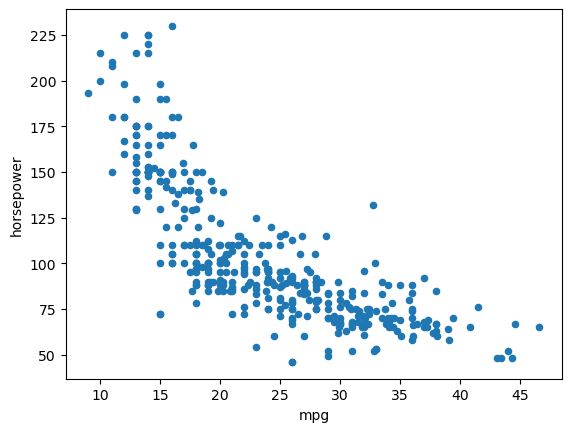

In [18]:
df.plot(kind = 'scatter', x='mpg', y ='horsepower')


#### Making your plots pretty and useful. 

There are a lot of options for changing the appearance of your plots. For examplel, you can change the style of plot using the `kind` paramemter and setting it to the desired plot type. 

Your options are (not all of these may work for your data: 

- 'line' : line plot (default)
- 'bar' : vertical bar plot
- 'barh' : horizontal bar plot
- 'hist' : histogram
- 'box' : boxplot
- 'kde' : Kernel Density Estimation plot
- 'density' : same as ‘kde’
- 'area' : area plot
- 'pie' : pie plot
- 'scatter : scatter plot (DataFrame only)
- 'hexbin' : hexbin plot (DataFrame only)

Similarly, there are many other things you can specify. Go to the documentation for the [dataframe plotting function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) and explore your options. 

**Use the documentation and your smarts to understand what the below parameters are doing>**

**Next, try changing the plot changing the `ylabel` to something more sensible and by changing the color. Your options are found [here](https://matplotlib.org/stable/gallery/color/named_colors.html#).**

In [ ]:
df.plot(x='weight', y='mpg', kind = 'scatter', color = 'k', fontsize = 14, 
        xlabel = 'Weigth of car in pounds', title = 'some title')

You can see that the fontsize of the title and the x and y labels did not change.

Unfortunately, we cannot do this directly using pandas. We have to use matplotlib directly. So we import first the `pyplot` module from the matplotlib libary. [Pyplot](https://matplotlib.org/stable/tutorials/introductory/pyplot.html) is designed to easily create and manipulate matplotlib figures and works very similar to plotting in [Matlab](https://www.mathworks.com/products/matlab.html) a commonly used - but expensize - programming language in science & engineering
. 

In [ ]:
# this imports pyplot and makes it available when calling plt (this is a commong convention to save some typing)
import matplotlib.pyplot as plt

df.plot(x='weight', y='mpg', kind = 'scatter', color = 'k', fontsize = 14, xlabel = 'Weigth of car in pounds')

# We can then use the ylabel and title method in pyplot, which are a bit more flexible to adjust the fontsize.
plt.ylabel('Miles Per Gallon', fontsize = 20, color = 'b')
plt.title('Some big Title in Red', fontsize = 20, color = 'r')

# I really recommend to check out the tutorial for pyplot. 
# https://matplotlib.org/stable/tutorials/introductory/index.html

### Histograms 
Text taken from: [Python for Data Vizualization](https://www.linkedin.com/learning/python-for-data-visualization/effectively-present-data-with-python?autoplay=true&u=50844473) on LinkedIn Learning
> It is a common practice to create histograms to explore your data as it can give you a general idea of what your data looks like. A histogram is a summary of the variation in a measured variable. It shows the number of samples that occur in a category. A histogram is a type of frequency distribution.

>Histograms work by binning the entire range of values into a series of intervals and then counting how many values fall into each interval. While the intervals are often of equal size, they are not required to be." 

It would be nice if we could summarize the distribution of our gas milage. 

In [ ]:
df['mpg']

Let's create a histogram. 

**Compare the two histograms below, what does the `bins` specify in each? What is the difference?**

You may have also noticed that I used two different methods to create a histogram. Either one works, but they behave slightly differently. 

In [ ]:
df['mpg'].plot(kind = 'hist', bins =7)

In [ ]:
df['mpg'].hist(bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])

Finally try creating a nice histogram that shows the distribution of `weight` and has all the features like lables, titles, etc that wou yould expect from a nice plot. 

In [ ]:
# You can use this as a starter and refer to the plots on how to modify this:

df['weight'].plot(kind = 'hist', grid = True)

## Wrapping Up

There is so much more to learn about data visualization. However, we have to end it here. If you want to learn more, there is a course on [LinkedIn Learning](https://www.linkedin.com/learning) on [Data Visualization with Python](https://www.linkedin.com/learning/python-for-data-visualization-2019/).  You can check this out if you want, your JMU account will give you access.